# PCA Assignment
* Jorge Enrique Serangelli Andrade - 596711

# **1 Descripción de Dataset y Analisis Exploratorio**

## **Base de datos**:
* Agarre el siguiente base de datos de [UC Irvine](https://archive.ics.uci.edu/dataset/53/iris) esta base de datos trata sobre tipos de flores
* En la página hay un apartado que dice import in python, que da un codigo para importar la bases de datos a Python
* El dataset Iris pertenece al área de la botánica y se utiliza para tareas de clasificación supervisada. Contiene mediciones de flores de tres especies de iris: setosa, versicolor y virginica. Las variables predictoras son cuatro características numéricas: longitud y ancho del sépalo, y longitud y ancho del pétalo. La variable objetivo (target) es la especie de la flor, que es la clase que se busca predecir a partir de esas mediciones.



**Explicación de celda de código**: Asegurar que la libreria para poder bajar la base de datos de UC Irvine que fue un repositorio que el profesor Andrés sugirió utilizar

In [167]:
pip install ucimlrepo

**Explicación de celda de codigo**: Aqui se importan librerias esenciales como pandas para los dataframes, numpy para calculos matematicos, matplotlib para hacer graficas junto a una libreria para hacer mas bonitas las graficas, seaborn para hacer una matriz de correlación y ucimlrepo que es para poder bajar la base de datos deseada de la página a Python que en este caso es la base de datos de iris que trata sobre flores.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('ggplot')
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

**Explicación de celda de codigo**: Quiero visualizar los datos features que se almacenaron en X que son las features y en la "y" que es el target

In [169]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [170]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


**Explicación de celda de codigo**: X.shape lo que me dice es el tamaño de la base de datos, en la que el primer valor del parentesis representa los renglones y el segundo las columnas.

In [171]:
X.shape

(150, 4)

**Explicación de celda de codigo**: Lo que X.isnull() es que si encuentra un nulo en la posición i (renglon) y la posición j (columna) lo marca True, y si no encuentra nulo lo marca False, al aplicarle sum() hace que sume toda la columna para cada variable y si da 0 en cada variable, significa que no tiene datos nulos, pero si tiene un numero que no es 0, significa que encontro un valor nulo para una variable o mas.

In [172]:
X.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


Como la suma de cada columna de los valores faltantes es 0, significa que no hay valores que falten

**Explicación de celda de codigo**: X.describe() lo que hace es describirme el DataFrame de manera básica, por ejemplo me da el promedio por cada variable, desviación estandar, el conteo, el minimo, maximo y los cuartiles.

In [173]:
# Una exploración estadistico basico
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Se puede observar que cada variable se contaron 150, en el que respecto a los renglones de la base de datos es la misma, lo cual indica que no hay datos faltantes. En el promedio se puede observar cual es el tamaño tipico de cada medida de cada parte de la flor. En la varianza se puede observar que "sepal length" es el que tiene mayor varianza, esto da a entender que esta variable cambia mucho entre flores.

**Explicación de celda de codigo**: Aqui utilizo numpy para sacar realmente los rangos de cada contenedor de un histograma

In [174]:

freq, bin_edges = np.histogram(X,10) #la frecuencia real de las repeticiones, y el segundo parametro los contenedores
print(freq)
print(bin_edges)



[ 50  96  62 101  48  49  78  69  36  11]
[0.1  0.88 1.66 2.44 3.22 4.   4.78 5.56 6.34 7.12 7.9 ]


**Explicación de celda de codigo**: Utilizando los rangos obtenidos para contenedor previamente, grafico el histograma, uno sin apilar y otro sin apilar para poder complementar la información.

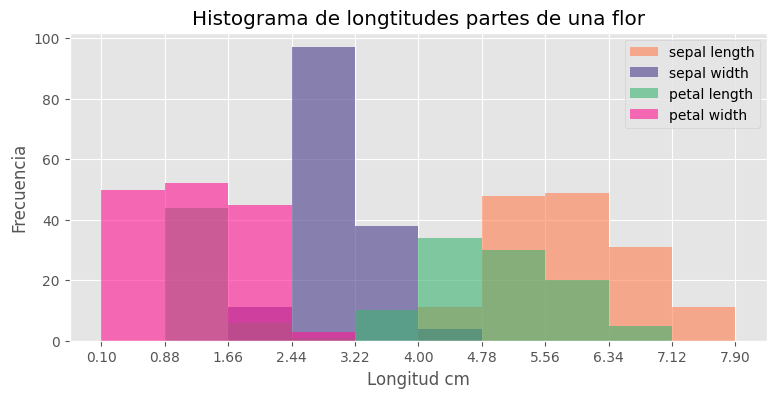

In [175]:
X.plot(kind='hist', figsize=(9,4), bins=10, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen', 'deeppink'], alpha=0.6)
plt.title('Histograma de longtitudes partes de una flor')
plt.xlabel('Longitud cm')
plt.ylabel('Frecuencia')
plt.show()

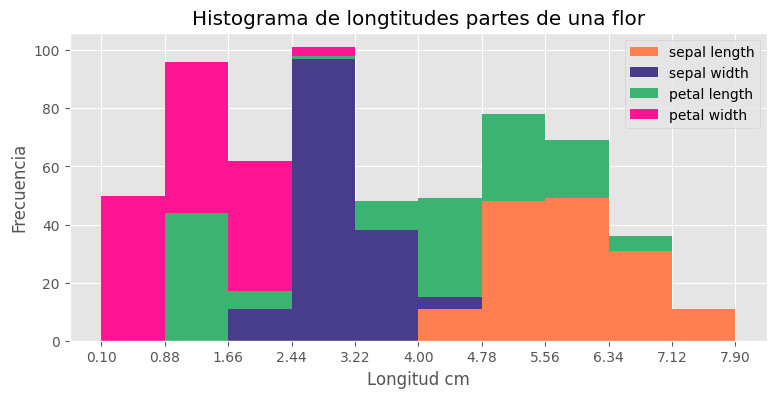

In [176]:
X.plot(kind='hist', figsize=(9,4), bins=10, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen', 'deeppink'], stacked=True)
plt.title('Histograma de longtitudes partes de una flor')
plt.xlabel('Longitud cm')
plt.ylabel('Frecuencia')
plt.show()

Se puede observar que complementando el histograma sin apilar y el apilado, la concentración del ancho de sepal se encuentra en un rango de 2.44 a 3.22 cm con una frecuencia de 97 aproximadamente. Mientras que el ancho de petal se 0.88 a 1.66 cm, aunque también en 0.10 a 0.88 cm y 1.66 a 2.44. Longitud  de sepal se encuentra en 4.78 a 5.56 cm y también en 5.56 a 6.34 cm, mientras que la longitud de de petal se encuentra en 4.00 a 4.78 cm y 4.78 a 5.56 cm.

Estos histogramas nos permiten ver que medidas de una flor se encuentran mas concentradas por cada grupo.

**Explicación de celda de codigo**: Aqui dibujo usando seaborn una matriz de correlación para ver la correlación entre las features

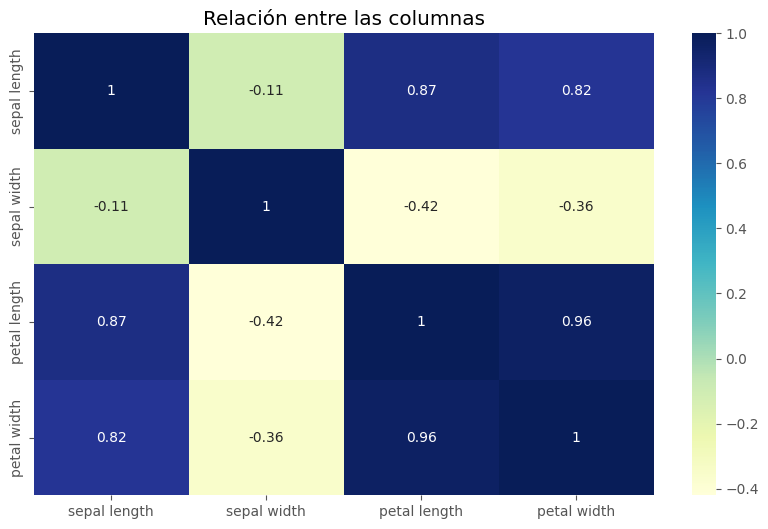

In [177]:
# Ver cómo se relacionan las variables
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.title("Relación entre las columnas")
plt.show()

La matriz de correlación muestra la relación lineal entre las variables con valores entre −1 y 1. La relación más fuerte es entre petal length y petal width que es 0.96, seguida de su relación con sepal length 0.87 y 0.82, lo que indica asociación positiva alta entre tamaños de pétalo y longitud del sépalo. Sepal width presenta correlaciones negativas moderadas con petal length −0.42 y petal width −0.36, y casi no se relaciona con sepal length −0.11. Esto muestra que sepal width se comporta de forma distinta al resto de variables.

**Explicación de celda de código**: Aqui utiliza función de seaborn llamada pairplot, que sirve para ver de manera grafica las features respecto a otras features y me sirve para ver su dispersión.

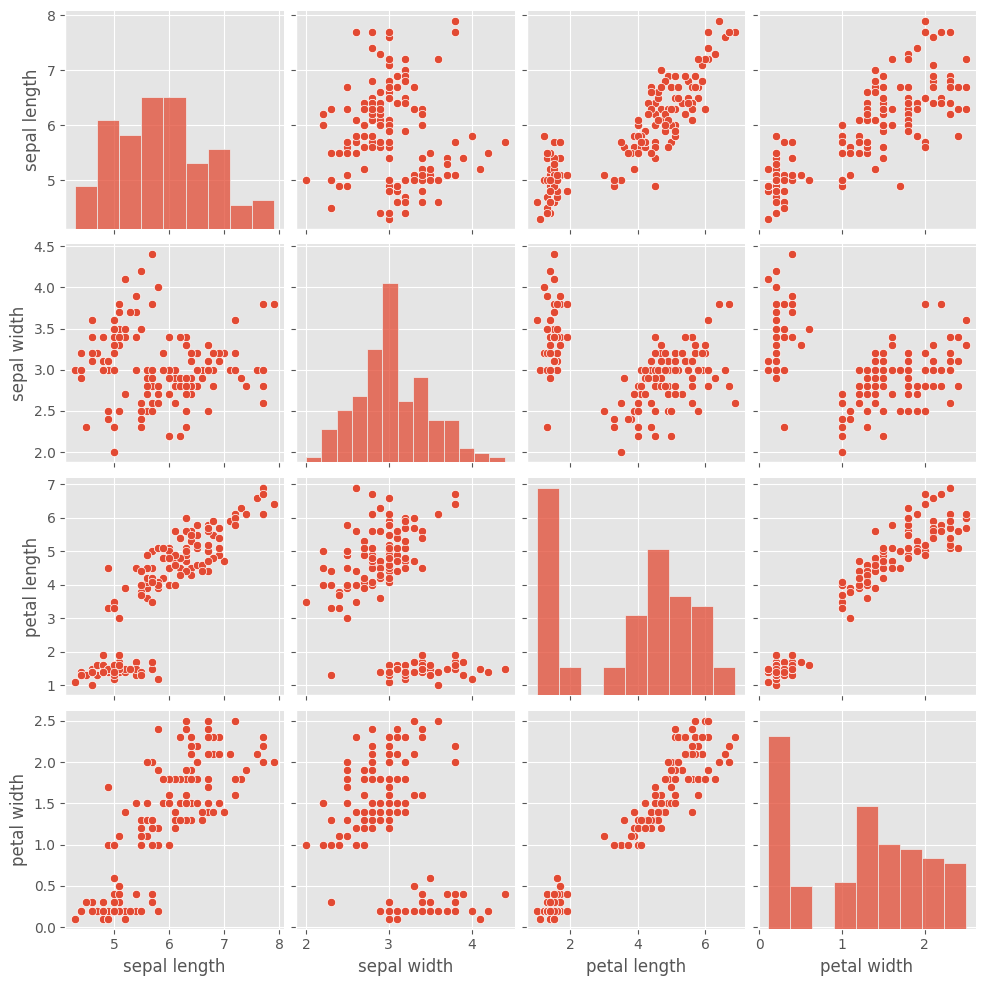

In [178]:
sns.pairplot(X)
plt.show()


Puedo observar que petal width respecto a petal length tiene una correlación notable y viceversa. También pareciera que petal length tiene correlación con sepal length. Y sepal width no tiene nada que ver con petal width.

# **2 Principal Component Analysis Procedure**

Tras explorar los datos, ver que no tienen datos faltantes, ver donde se concentran los datos mediante uso de histogramas, matriz de correlación y ver las dispersión entre los features. Se aplicara PCA para reducir la dimensionalidad del dataset, simplificar la información y concentrar la mayor variabilidad posible en menos variables sin perder información clave. Para esto se aplicara los pasos enseñados en clase las cuales son:

* Obtener los datos (esto realizado ya)
* Restar la media (centrar datos)
* Calcular matriz de covarianza
* Calcular eigenvalues y eigenvectors
* Seleccionar los componentes principales y formar el vector feature
* Derivar nuevo dataset

**Explicación de celda de código**: Importo de la libreria StandardScaler y llamo desde sklearn.preprocessing para que cada variable de las features tenga media 0.

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**Explicación de celda de código**: Cálculo de la matriz de covarianza

La covarianza mide cómo varían dos variables juntas, es decir, indica si cuando una variable aumenta la otra también tiende a aumentar, a disminuir o si no existe relación lineal entre ellas. En PCA, la matriz de covarianza permite identificar qué variables cambian de forma similar y en qué dirección se concentra la mayor variabilidad de los datos.

Matemáticamente, la matriz de covarianza se calcula como:

$$
\Sigma = \frac{1}{N - 1} X^T X
$$

donde:

- $X$ es la matriz de datos centrados (media cero),
- $X^T$ es la transpuesta de $X$,
- $N$ es el número de observaciones,
- $\Sigma$ es la matriz de covarianza resultante.

Los valores diagonales representan la varianza de cada variable, mientras que los valores fuera de la diagonal representan la covarianza entre pares de variables.

En Python se utiliza numpy para calcular covarianza, solamente que se utiliza la transpuesta como parametro de función porque numpy asume que cada fila representa una variable y cada columna una observación, y esto no es asi, ya que la mayoría de datasets cada fila corresponde a una observación y cada columna a una variable, por lo que es necesario transponer la matriz para que NumPy interprete correctamente la orientación de los datos al calcular la covarianza.


In [180]:
cov_matrix = np.cov(X_std.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

La matriz de covarianza esta bien, por que me debe de una matriz de 4x4 por que el dataset contiene 4 features y cada una se compara entre si y consigo misma. La diagonal que tiene el mismo valor representa la varianza de cada variable y los que estan afuera son la covarianza entre pares de variables

**Explicación de celda de código**: Obtengo eigenvalores y eigenvectores utilizando la matriz de covarianza previamente obtenida, que a partir de esta se obtienen los eigenvectores y eigenvalores, que describen las direcciones principales de variación de los datos y la magnitud de esa variación.

En este contexto, $v$ representa los eigenvectores, que indican las direcciones principales del espacio de los datos, y $\lambda$ representa los eigenvalores, que indican cuánta varianza existe en cada una de esas direcciones.

In [181]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"Los eigenvalues son: \n\n{eigenvalues}\n")
print(f"Los eigenvalues son: \n\n{eigenvectors}")

Los eigenvalues son: 

[2.93035378 0.92740362 0.14834223 0.02074601]

Los eigenvalues son: 

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


**Explicación de celda de código**: En este paso se construye la matriz de transformación $F$ usando los eigenvectores asociados a los mayores eigenvalores, en donde primero ordeno los eigenvalores de mayor a menor ya que representan la cantidad de varianza explicada por cada componente principal, luego se reordenan los eigenvectores en el mismo orden para mantener la correspondencia, una vez hecho lo previo selecciono los primeros eigenvectores que son los mas importantes para formar la matriz $F$, que contiene las direcciones principales del espacio transformado.

Finalmente, el nuevo dataset se obtiene proyectando los datos estandarizados sobre esas direcciones:

$$
X_{pca} = X_{std} F
$$

In [182]:
indice = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[indice]
eigenvectors = eigenvectors[:, indice]
print(eigenvalues)
print(eigenvectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [183]:
F = eigenvectors[:, :3]
F

array([[ 0.52237162, -0.37231836, -0.72101681],
       [-0.26335492, -0.92555649,  0.24203288],
       [ 0.58125401, -0.02109478,  0.14089226],
       [ 0.56561105, -0.06541577,  0.6338014 ]])

In [184]:
X_pca = X_std @ F
X_pca

array([[-2.26454173e+00, -5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00,  6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00,  3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00,  5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00, -6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00, -1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00, -7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00, -2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00,  1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00,  4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00, -1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00, -1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00,  7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00,  9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00, -1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00, -2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00, -1.51375028e+00

In [185]:
#Aqui no mas quiero checar si coinciden el tamaño de renglones,
#obviamente las columnas no por que quise agarrar los 3 componentes mas importantes
print(X_std.shape)
print(X_pca.shape)


(150, 4)
(150, 3)


**Explicación de celda de código**: Lo que hago en este codigo es obtener cuanta varianza explican los componentes obtenidos usando PCA

In [186]:
var_exp = eigenvalues / np.sum(eigenvalues)
print(var_exp)
print("Varianza acumulada:", np.cumsum(var_exp))


[0.72770452 0.23030523 0.03683832 0.00515193]
Varianza acumulada: [0.72770452 0.95800975 0.99484807 1.        ]


El PCA si funciono, toda la información se concentra en el primer componente con 0.72770452 y si lo sumo con el segundo componente abarco 0.95800975 de la información. Y por ultimo si lo sumo con el tercero ya casi es 1 que es 0.99484807.

**Explicación de celda de código**: En este código se grafica el resultado del PCA usando las tres primeras componentes principales en un espacio 3D. Primero convierto las clases de la variable target a valores numéricos para poder colorear los puntos según su categoría. Después se crea un gráfico de dispersión 3D donde cada punto representa una observación proyectada en las nuevas dimensiones (PC1, PC2 y PC3). Finalmente se ajusta el ángulo de visualización para observar mejor la separación entre los grupos.

In [187]:
import plotly.express as px

y_num = y['class'].astype('category').cat.codes

df3d = pd.DataFrame(X_pca[:, :3], columns=["PC1","PC2","PC3"])
df3d["class"] = y['class']  # o pon y_num si quieres números

fig = px.scatter_3d(df3d, x="PC1", y="PC2", z="PC3", color="class", opacity=0.8)
fig.show()


Se observa que PCA logró separar bastante bien las especies en el nuevo espacio reducido, especialmente una de ellas que queda claramente aislada del resto. Las otras dos especies están más cercanas y tienen algo de solapamiento, lo que indica que comparten características similares. En general, las primeras componentes principales capturan bien la estructura del dataset.

**Explicación de celda de código**: Aqui hago un gráfico 2D del primer componente respecto al segundo por que previamente habia visto que si sumo sus varianzas es la que mas información cubre.

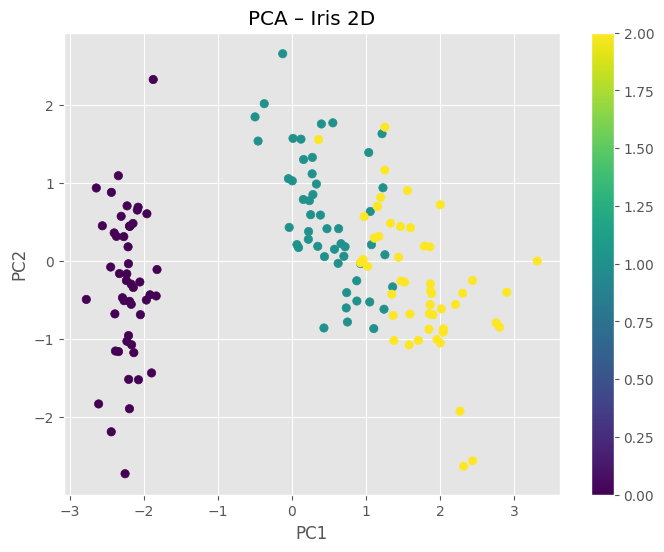

In [188]:
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_num, cmap='viridis')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – Iris 2D")
plt.colorbar()
plt.show()


Este gráfico muestra que al aplicar PCA los datos se reorganizan en nuevas dimensiones que concentran la mayor variabilidad del dataset, por eso es más fácil visualizar la estructura de los datos y notar que una especie queda claramente separada mientras que las otras dos presentan cierto traslape, esto indica que comparten características similares, en general PCA sirvió porque redujo la dimensionalidad sin perder la información más importante y permitió entender mejor la distribución y relación entre las clases

# **Conclusión**

Al hacer la exploración inicial del dataset utilicé la matriz de correlación para ver qué tan relacionadas estaban las features entre sí, y también histogramas para entender dónde se concentraban los valores y la frecuencia de cada variable, con esto confirmé que había redundancia y patrones claros en los datos, luego al aplicar PCA se logró reducir la dimensionalidad conservando la mayor parte de la información relevante, ya que el primer componente explica 0.7278 de la varianza y el segundo 0.2303, es decir, juntos cubren casi toda la información del dataset, esto simplifica el espacio de características y elimina variables repetidas, facilitando que un modelo neuronal de clasificación como en el caso de Iris trabaje con datos más compactos y representativos para separar mejor las especies.

El link a mi repositorio de GitHub con el notebook: https://github.com/BlackSerangelli/02-Principal-Component-Analysis

# **Referencias**

* Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.
